# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

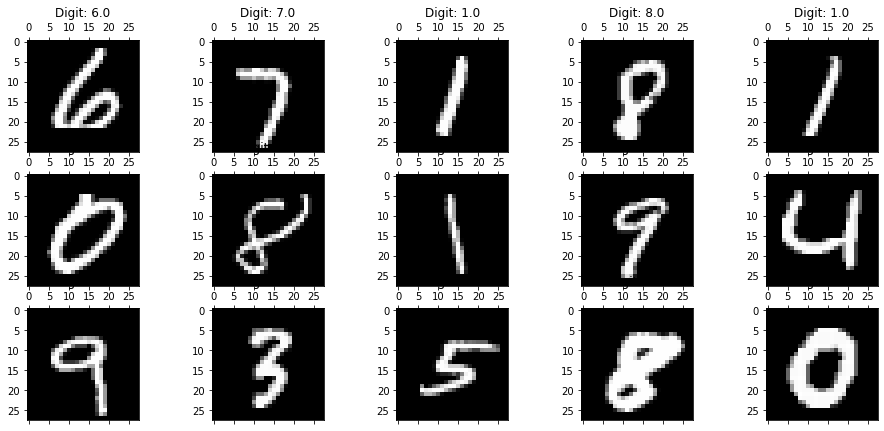

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=X.shape[1], copy=False)
pca_x = pca.fit_transform(X_train)
pca_x #pca적용

array([[-5.77204739e+02,  1.65567715e+01,  4.07606201e+02, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [-4.69473894e+02,  6.12545244e+02, -3.56167264e+02, ...,
         2.96037778e-14,  2.07421101e-13, -9.60531423e-14],
       [-6.86730026e+02, -6.65122764e+01, -2.16282798e+02, ...,
         9.25427972e-14, -2.87800792e-13,  7.34007123e-14],
       ...,
       [-1.18449673e+02,  5.25810755e+02, -4.12119320e+02, ...,
        -3.53985919e-15,  1.24238893e-15, -2.36801854e-15],
       [ 1.72269740e+03, -6.12935358e+02,  5.78198893e+02, ...,
        -6.75549114e-15,  6.26119953e-16, -2.32320529e-15],
       [ 6.84332184e+01, -6.95630807e+01, -1.94701552e+02, ...,
        -4.04751266e-15,  2.36864302e-15, -2.72037391e-15]])

Text(0.5, 0, 'Factor Number')

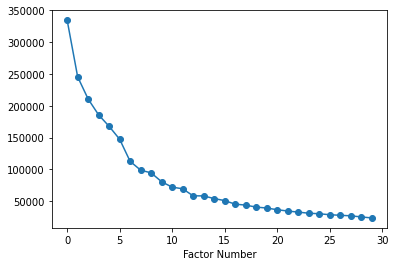

In [19]:
exv = pca.explained_variance_ #고윳값
plt.plot(np.arange(exv[:30].shape[0]), exv[:30], marker='o') # factor넘버 30개만 표시 
plt.xlabel("Factor Number")

Factor Number 가 11이 되는 위치에서 Elbow Point가 관측되었다.

In [23]:
#lda: 데이터를 잘 구분하는 직선 찾아내기
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
lda_X = clf.fit_transform(X_train,y_train.reshape(-1)) # LDA 모듈은 one-hot을 받지 않기 때문에 y에서 y_train에 해당하는 부분만 사용.
lda_X.shape

(56000, 9)

In [25]:
# 각 변수의 설명력을 구할 수 있다.
clf.explained_variance_ratio_

array([0.23708117, 0.20328823, 0.17798282, 0.10633489, 0.09415639,
       0.06896763, 0.04990535, 0.03507761, 0.02720591])

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
import time

from sklearn.metrics import accuracy_score
lr = LogisticRegression(max_iter=1000, random_state=42) # warnings 방지
svc = SVC(random_state = 42, max_iter=1000)
ada = AdaBoostClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)

# 모두 기본 파라미터로 학습

models = [lr, svc, ada, rf, lgbm]

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [27]:
# 원본 데이터로 네 모델 모두 학습 후 예측하는데 걸리는 시간 측정
start = time.time()

for model in models:
    model.fit(X_train, y_train.reshape(-1))
    print(f"model: {model.__class__()}, accuracy_score: {accuracy_score(y_test, model.predict(X_test))}")

end = time.time()

print("경과시간", end - start)

c:\Users\momo8\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


model: LogisticRegression(), accuracy_score: 0.9162142857142858


c:\Users\momo8\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


model: SVC(), accuracy_score: 0.9795
model: AdaBoostClassifier(), accuracy_score: 0.7192857142857143
model: RandomForestClassifier(), accuracy_score: 0.969
model: LGBMClassifier(), accuracy_score: 0.977
경과시간 877.386159658432


In [28]:
# pca 80%로 축소
pca = PCA(n_components=0.80, copy=False)
pca_x = pca.fit_transform(X_train)

# LDA 변환
clf = LinearDiscriminantAnalysis()
lda_X = clf.fit_transform(X_train,y_train.reshape(-1)) 

In [29]:
# 테스트 데이터에 대한 변환
pca_test_X = pca.transform(X_test) # fit 하지않고 transform만 실시함
lda_test_X = clf.transform(X_test)

In [30]:
# pca 된 데이터로 네 모델 모두 학습 후 예측하는데 걸리는 시간 측정
start = time.time()

for model in models:
    model.fit(pca_x, y_train.reshape(-1))
    print(f"model: {model.__class__()}, accuracy_score: {accuracy_score(y_test, model.predict(pca_test_X))}")

end = time.time()

print("경과시간", end - start)

c:\Users\momo8\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


model: LogisticRegression(), accuracy_score: 0.9046428571428572


c:\Users\momo8\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


model: SVC(), accuracy_score: 0.983
model: AdaBoostClassifier(), accuracy_score: 0.699
model: RandomForestClassifier(), accuracy_score: 0.9528571428571428
model: LGBMClassifier(), accuracy_score: 0.9657142857142857
경과시간 202.7138123512268


In [31]:
# lda 된 데이터로 네 모델 모두 학습 후 예측하는데 걸리는 시간 측정
start = time.time()

for model in models:
    model.fit(lda_X, y_train.reshape(-1))
    print(f"model: {model.__class__()}, accuracy_score: {accuracy_score(y_test, model.predict(lda_test_X))}")

end = time.time()

print("경과시간", end - start)

model: LogisticRegression(), accuracy_score: 0.8869285714285714


c:\Users\momo8\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


model: SVC(), accuracy_score: 0.9172142857142858
model: AdaBoostClassifier(), accuracy_score: 0.8379285714285715
model: RandomForestClassifier(), accuracy_score: 0.9167857142857143
model: LGBMClassifier(), accuracy_score: 0.9148571428571428
경과시간 81.00808882713318
